**Source—Kaggle - Healthcare Dataset (Dummy data with a multi-category classification problem)**
    This synthetic healthcare dataset has been created to serve as a valuable resource for data science, machine learning, and data analysis enthusiasts. It is designed to mimic real-world healthcare data, enabling users to practice, develop, and showcase their data manipulation and analysis skills in the context of the healthcare industry.

The inspiration behind this dataset is rooted in the need for practical and diverse healthcare data for educational and research purposes. Healthcare data is often sensitive and subject to privacy regulations, making it challenging to access for learning and experimentation. To address this gap, I have leveraged Python's Faker library to generate a dataset that mirrors the structure and attributes commonly found in healthcare records. By providing this synthetic data, I hope to foster innovation, learning, and knowledge sharing in the healthcare analytics domain.

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("healthcare_dataset.csv")
data.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


**Understanding the data**

In [6]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [8]:
data.shape

(55500, 15)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [12]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [14]:
data = data.drop('Billing Amount', axis =1)

In [16]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [18]:
#Creating a column for days hospitalised
data['Days hospitalised'] = (pd.to_datetime(data['Discharge Date']) - pd.to_datetime(data['Date of Admission'])).dt.days
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days hospitalised
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,458,Urgent,2022-10-09,Penicillin,Abnormal,20


**EDA**

**Difference between value_counts(), size(), count()**
- Use .value_counts() when analyzing frequency of unique values
- Use .size() for total group size (including missing data) (used along with groupby function)
- Use .count() when you care only about non-missing values

In [22]:
#Gender
data['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [24]:
#Identifying the range of Age
min_age = data['Age'].min()
max_age = data['Age'].max()
min_age, max_age

(13, 89)

In [26]:
#Grouping age and creating a new column
def age_group(age):
    if 13 <= age <= 20:
        return 'Between 13 to 20'
    elif 20 < age <= 40:
        return 'Between 21 to 40'
    elif 40 < age <= 60:
        return 'Between 41 to 60'
    else:
        return 'Between 61 to 89'

# Apply the function to create the 'Age_Group' column
data['Age Group'] = data['Age'].apply(age_group)
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days hospitalised,Age Group
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,328,Urgent,2024-02-02,Paracetamol,Normal,2,Between 21 to 40
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,Between 61 to 89
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,205,Emergency,2022-10-07,Aspirin,Normal,15,Between 61 to 89
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,Between 21 to 40
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,458,Urgent,2022-10-09,Penicillin,Abnormal,20,Between 41 to 60


In [28]:
data['Age Group'].value_counts()

Age Group
Between 61 to 89    20370
Between 41 to 60    16506
Between 21 to 40    16181
Between 13 to 20     2443
Name: count, dtype: int64

In [30]:
#Medical condition
data['Medical Condition'].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

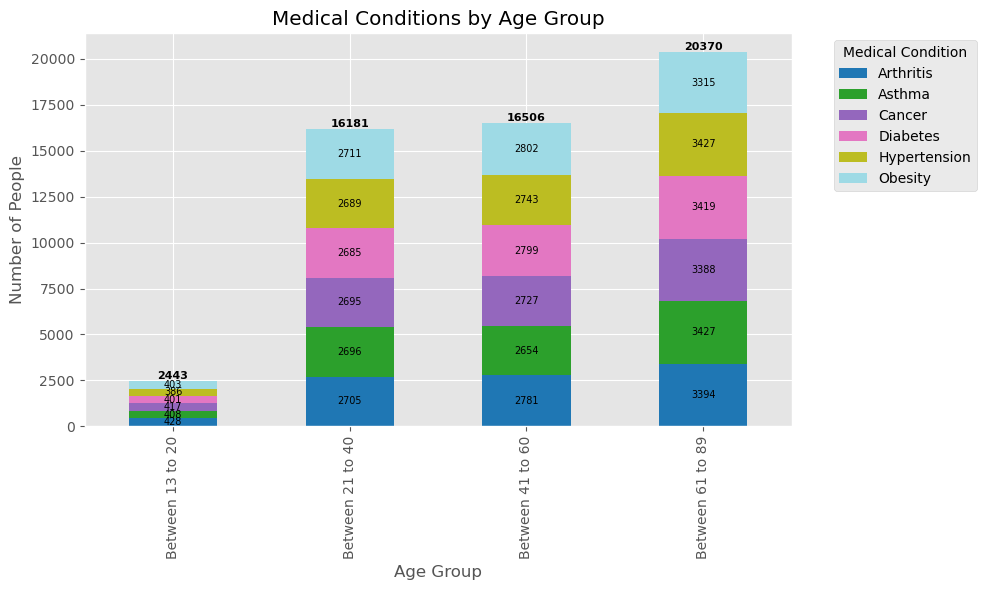

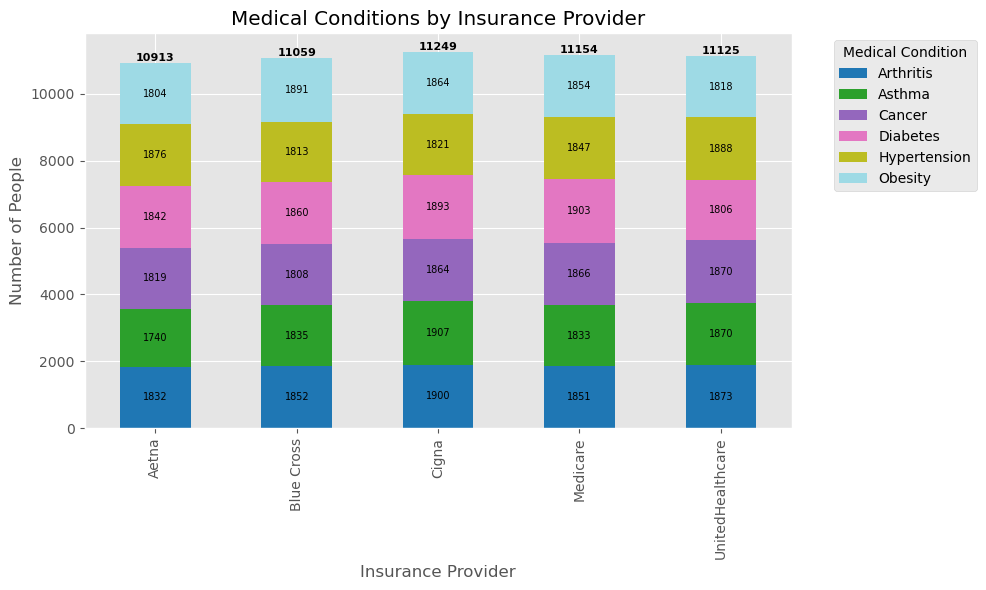

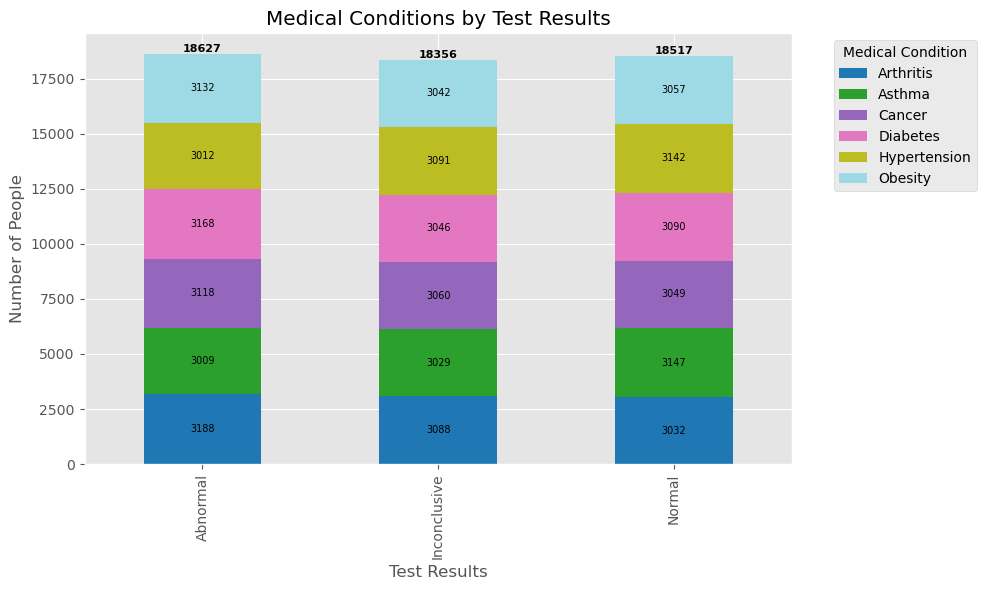

In [32]:
#Visualization of Medical Conditions across Age group, Insurance Provider and Test Results
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # Optional styling

# List of (group_by_column, chart_title)
groupings = [('Age Group', 'Medical Conditions by Age Group'),
    ('Insurance Provider', 'Medical Conditions by Insurance Provider'),
    ('Test Results', 'Medical Conditions by Test Results')]

# Optional: define category orderings
custom_orders = {'Age Group': ['Between 13 to 20', 'Between 21 to 40', 'Between 41 to 60', 'Between 61 to 89']}

for group_col, chart_title in groupings:
    # Group and pivot the data
    grouped = data.groupby([group_col, 'Medical Condition']).size().unstack(fill_value=0)

    # Apply custom category order if defined
    if group_col in custom_orders:
        grouped = grouped.reindex(custom_orders[group_col])

    # Plot
    ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

    # Annotate values inside bars
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{int(height)}',
                            xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                            ha='center', va='center', fontsize=7)

    # Annotate totals above bars
    totals = grouped.sum(axis=1)
    for i, total in enumerate(totals):
        ax.annotate(f'{int(total)}', xy=(i, total), ha='center', va='bottom',
                    fontsize=8, fontweight='bold')

    # Final touches
    plt.title(chart_title)
    plt.xlabel(group_col)
    plt.ylabel('Number of People')
    plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

C:\Users\koush\AppData\Local\Temp\ipykernel_9448\3369796435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Test Results', y='Days hospitalised', data=data, palette='YlGnBu', showfliers=False)


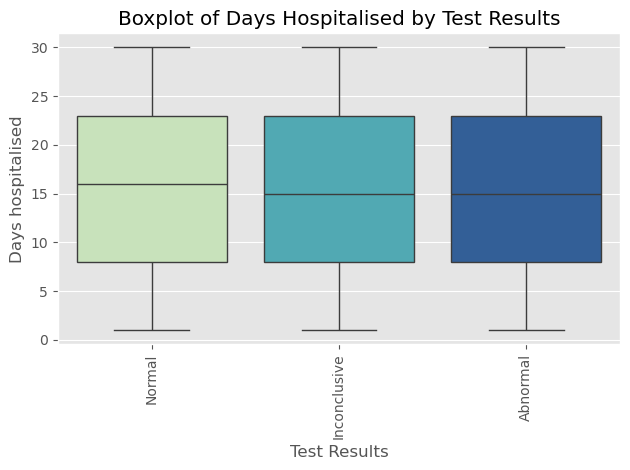

In [34]:
#Days Hospitalised and Test Results
sns.boxplot(x='Test Results', y='Days hospitalised', data=data, palette='YlGnBu', showfliers=False)
# Plot formatting
plt.title('Boxplot of Days Hospitalised by Test Results')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [36]:
#Hospital
data['Hospital'].value_counts().head(10)

Hospital
LLC Smith      44
Ltd Smith      39
Johnson PLC    38
Smith Ltd      37
Smith PLC      36
Smith Group    36
Johnson Inc    35
Smith Inc      34
Smith LLC      32
Group Smith    32
Name: count, dtype: int64

In [38]:
#Number of Hospitals
len(data['Hospital'].unique())

39876

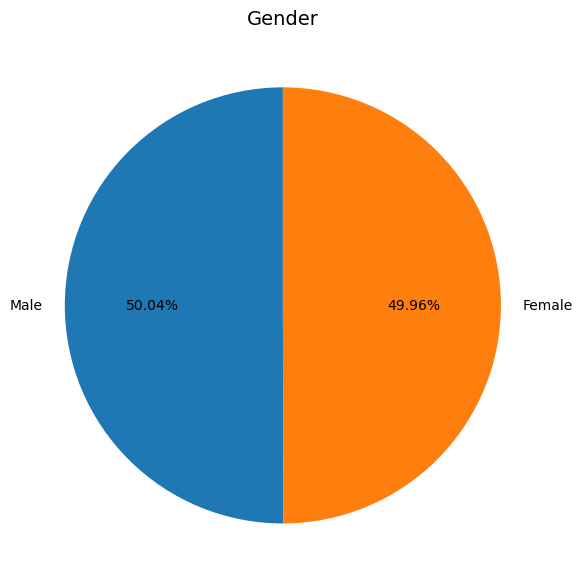

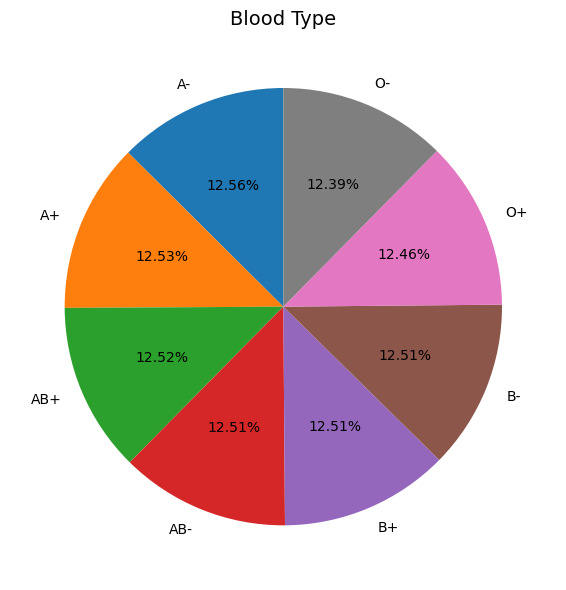

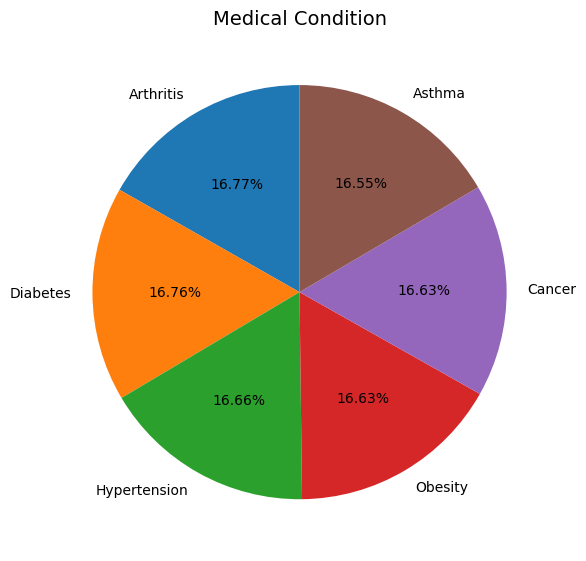

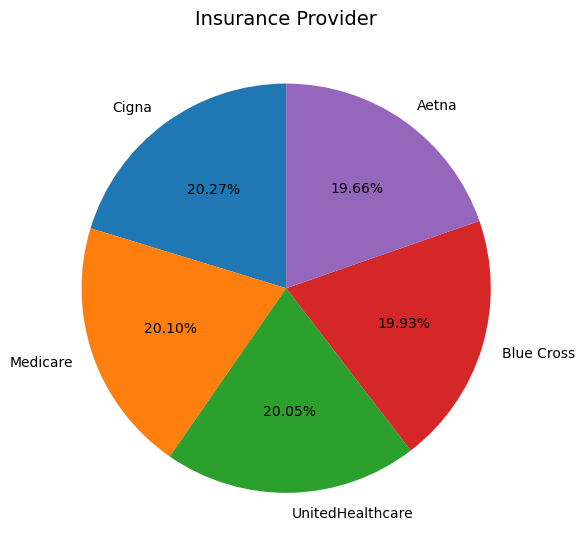

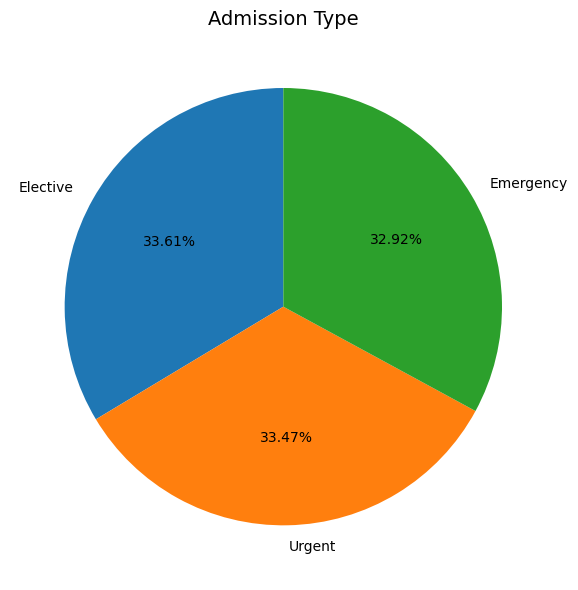

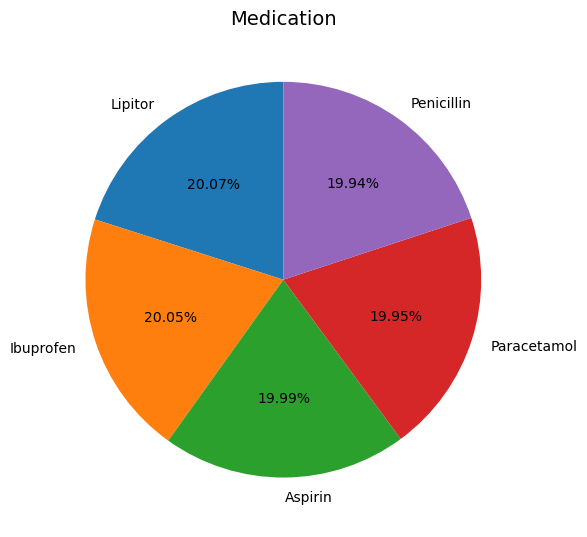

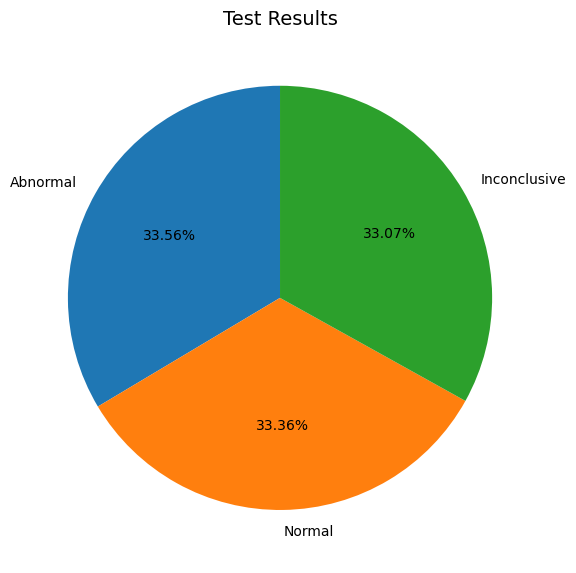

In [40]:
# Visualization of Categorical Features
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

plt.style.use('ggplot') 

for i in cols:
    plt.figure(figsize=(6, 6))
    plt.title(i, fontsize=14)
    data[i].value_counts().plot(
        kind='pie',
        autopct='%.2f%%',
        startangle=90,
        colors=sns.color_palette("tab10")
    )
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

In [42]:
#NUmber of Doctors
len(data['Doctor'].unique())

40341

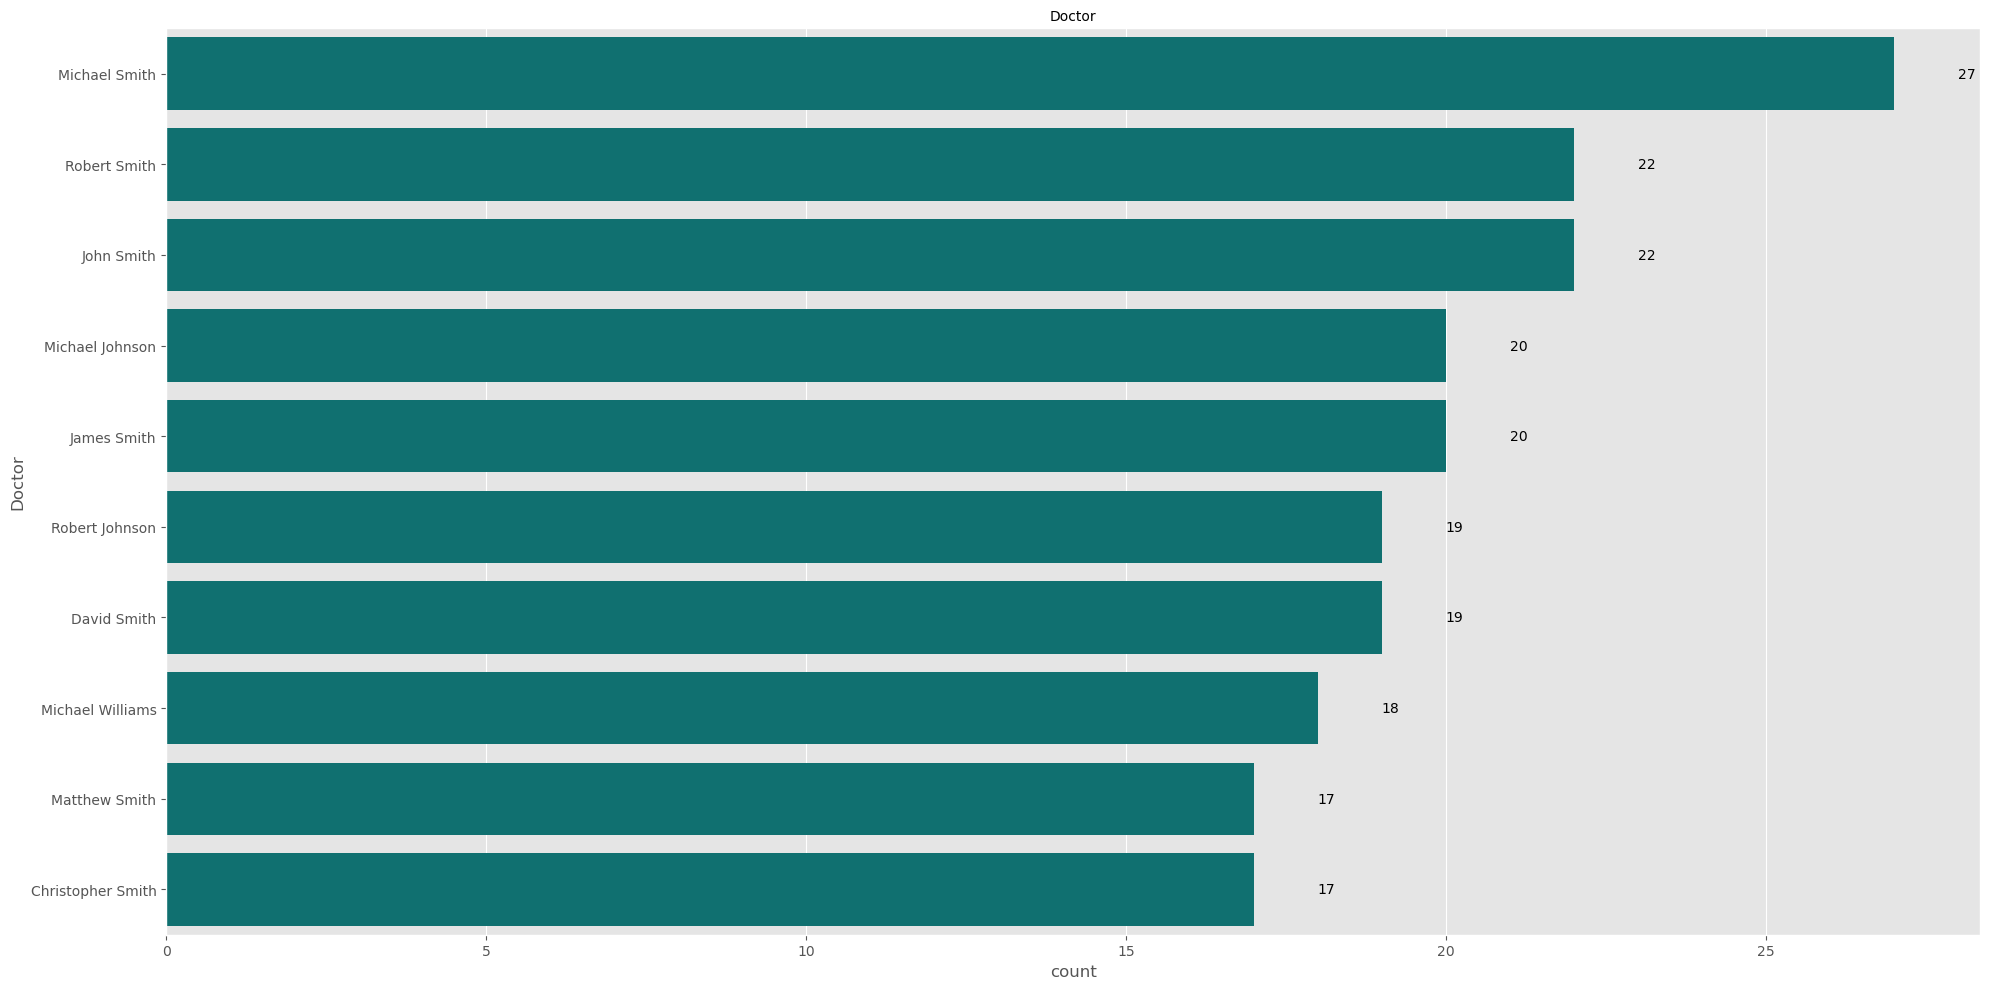

In [44]:
#Visualizing Top 10 Doctors with highest patient count
fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(data, y = "Doctor", ax = ax, color = 'teal', order=data['Doctor'].value_counts().iloc[:10].index)
ax.set_title("Doctor", fontsize = 10)

#Annotating each bar with the count
for p in ax.patches:
    count = int(p.get_width())  # width since it's a horizontal bar
    ax.annotate(f'{count}', 
                xy=(count + 1, p.get_y() + p.get_height() / 2), 
                va='center', 
                fontsize=10,
                color='black')
plt.tight_layout()
plt.show()

**MODEL BUILDING**

In [46]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Room Number', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results', 'Days hospitalised', 'Age Group'],
      dtype='object')

In [48]:
##Splitting data
X = data[['Gender', 'Blood Type', 'Medical Condition','Admission Type','Medication','Days hospitalised', 'Age Group']] 
y = data['Test Results']

In [50]:
#Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#Encode target
lb = LabelEncoder()
y_encoded = lb.fit_transform(y)

#Identify categorical features
categorical_cols = X.select_dtypes(include='object').columns.tolist()

#OneHotEncode categorical features
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric columns
)

#Encode the full X
X_encoded = ct.fit_transform(X)

In [58]:
y_encoded, X_encoded

(array([2, 1, 2, ..., 0, 0, 0]),
 array([[ 0.,  1.,  0., ...,  0.,  0.,  2.],
        [ 0.,  1.,  1., ...,  0.,  1.,  6.],
        [ 1.,  0.,  0., ...,  0.,  1., 15.],
        ...,
        [ 1.,  0.,  0., ...,  0.,  0., 28.],
        [ 0.,  1.,  0., ...,  1.,  0.,  6.],
        [ 1.,  0.,  0., ...,  1.,  0., 27.]]))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=88)

In [56]:
#Standardize numeric values (now all numeric after encoding)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [60]:
#Random Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
pred_2 = model.predict(X_test_scaled)

In [68]:
from sklearn.metrics import accuracy_score
acc = accuracy_score (y_test, pred_2)
print("Acc: %.2f%%" % (acc * 100.0))

Acc: 41.48%


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_2, target_names=lb.classes_))

              precision    recall  f1-score   support

    Abnormal       0.41      0.41      0.41      3657
Inconclusive       0.42      0.42      0.42      3681
      Normal       0.42      0.41      0.41      3762

    accuracy                           0.41     11100
   macro avg       0.41      0.41      0.41     11100
weighted avg       0.41      0.41      0.41     11100

